In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from datasets.movie_lens import MovieLensDataset

dataset = MovieLensDataset()

Rating Distributions

In [2]:
ratings_dataset = dataset.Ratings()

all_rating_values = ratings_dataset.Data()[ratings_dataset.Rating()]

In [3]:
mu_ratings = np.mean(all_rating_values)
std_ratings = np.std(all_rating_values)
print("Ratings average:            ", mu_ratings)
print("Ratings standard deviation: ", std_ratings)

Ratings average:             3.5304452124932677
Ratings standard deviation:  1.066352731022359


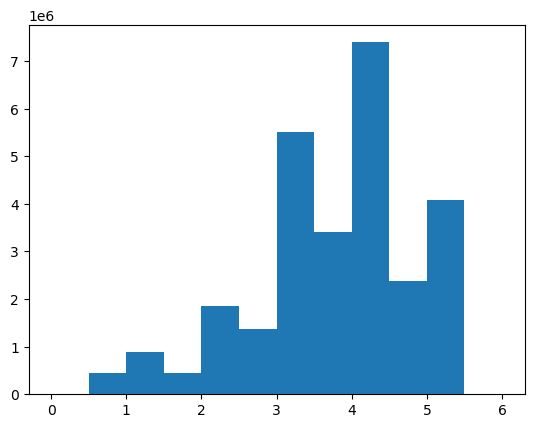

In [4]:
plt.hist(all_rating_values, bins=[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0])
plt.show()

Explores movie characteristics through user ratings

In [6]:
# Analyzes the popularity of each movie by counting the its number of ratings.
groupby_movie_id = ratings_dataset.Data().groupby(ratings_dataset.MovieId())

movie_engagement = groupby_movie_id[ratings_dataset.UserId()]  \
                                .count()                       \
                                .rename("engagement_count")

min_movie_engagement = np.min(movie_engagement)
max_movie_engagement = np.max(movie_engagement)
mu_movie_engagement = np.mean(movie_engagement)
median_movie_engagement = np.median(movie_engagement)

print("Engagement count minimum: ", min_movie_engagement)
print("Engagement count maximum: ", max_movie_engagement)
print("Engagement count average: ", mu_movie_engagement)
print("Engagement count median:  ", median_movie_engagement)

Engagement count minimum:  1
Engagement count maximum:  97999
Engagement count average:  515.0113010076268
Engagement count median:   7.0


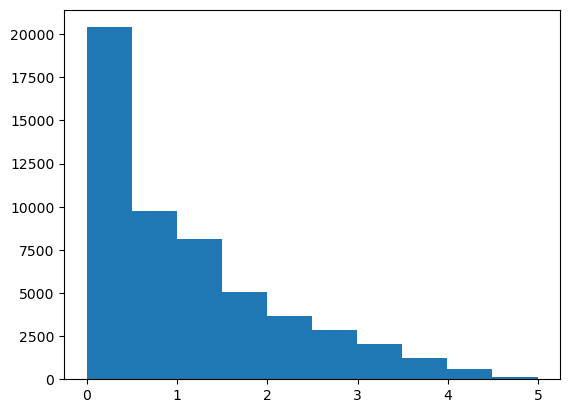

In [6]:
log_movie_engagement = np.log10(movie_engagement)
plt.hist(log_movie_engagement, bins=10, log=False)
plt.show()

In [7]:
# Checks if any relation between a movie's median rating and its engagement count.
movie_median_rating = groupby_movie_id[ratings_dataset.RatingColumnName()] \
                            .median()                                      \
                            .rename("median_rating")

df_movie_engagement = movie_engagement.to_frame()
df_movie_median_rating = movie_median_rating.to_frame()
df_engagement_and_median_rating = df_movie_engagement.join(df_movie_median_rating)

engagements = df_engagement_and_median_rating["engagement_count"].to_numpy()
ratings = df_engagement_and_median_rating["median_rating"].to_numpy()

np.corrcoef(ratings, engagements)

array([[1.        , 0.11183026],
       [0.11183026, 1.        ]])

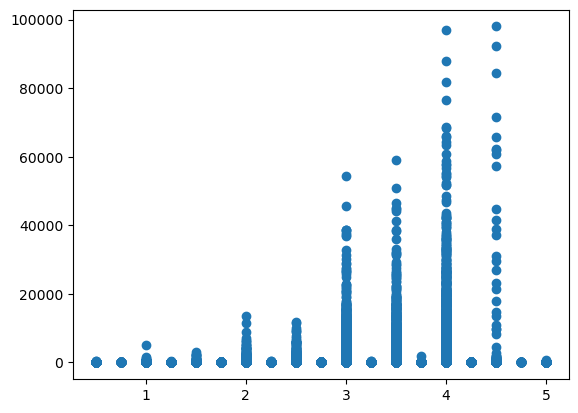

In [8]:
plt.scatter(ratings, engagements)
plt.show()